# Linear Regression

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# Change of the graph's style and color palette
sns.set(style="whitegrid", rc={"grid.linestyle": ":", "grid.color": "#1ebe9b", "grid.alpha": 0.2})
sns.set_palette("husl")

In [3]:
data = pd.read_csv('marketing_campaign.csv', sep="\t")

In [4]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

The following operations transform the 'data' DataFrame by altering, creating, and refining columns and their contents for better analysis and clarity

In [6]:
# Age calculation
data["Age"] = 2023 - data["Year_Birth"]

# Aggregating total kids
data["Kids"] = data["Kidhome"] + data["Teenhome"]

# Aggregating total spending
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

# Rename of columns
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumDealsPurchases": "DealsPurch", "NumWebPurchases": "WebPurch", "NumCatalogPurchases" : "CatalogPurch", "NumStorePurchases": "StorePurch", "NumWebVisitsMonth": "WebVisits"})

# Converting 'Marital_Status' column categories to binary values
data["Marital_Status"]=data["Marital_Status"].replace({"Married":"1", "Together":"1","Absurd":"0", "Widow":"0", "YOLO":"0", "Divorced":"0", "Single":"0", "Alone":"0"})
data = pd.get_dummies(data, columns=["Marital_Status"], drop_first=True)
data.rename(columns={'Marital_Status_1': 'Marital_Status'}, inplace=True)

# Simplifying 'Education'
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Dropping unnecessary columns 
to_drop = ["ID", "Year_Birth","Z_CostContact", "Z_Revenue", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]
data = data.drop(to_drop, axis=1)

# Dropping rows with missing values
data = data.dropna()

In [7]:
data

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,...,Gold,DealsPurch,WebPurch,CatalogPurch,StorePurch,WebVisits,Age,Kids,Spent,Marital_Status
0,Graduate,58138.0,0,0,2012-09-04,58,635,88,546,172,...,88,3,8,10,4,7,66,0,1617,False
1,Graduate,46344.0,1,1,2014-03-08,38,11,1,6,2,...,6,2,1,1,2,5,69,2,27,False
2,Graduate,71613.0,0,0,2013-08-21,26,426,49,127,111,...,42,1,8,2,10,4,58,0,776,True
3,Graduate,26646.0,1,0,2014-02-10,26,11,4,20,10,...,5,2,2,0,4,6,39,1,53,True
4,Postgraduate,58293.0,1,0,2014-01-19,94,173,43,118,46,...,15,5,5,3,6,5,42,1,422,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,2013-06-13,46,709,43,182,42,...,247,2,9,3,4,5,56,1,1341,True
2236,Postgraduate,64014.0,2,1,2014-06-10,56,406,0,30,0,...,8,7,8,2,5,7,77,3,444,True
2237,Graduate,56981.0,0,0,2014-01-25,91,908,48,217,32,...,24,1,2,3,13,6,42,0,1241,False
2238,Postgraduate,69245.0,0,1,2014-01-24,8,428,30,214,80,...,61,2,6,5,10,3,67,1,843,True


## Training a Linear Regression Model

In this analysis, we aim to employ various demographic and behavioral factors as predictors to estimate or forecast an individual's expenditure, represented by the '**Spent**' column, using a linear regression approach.

### Cleaning data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Education       2216 non-null   object        
 1   Income          2216 non-null   float64       
 2   Kidhome         2216 non-null   int64         
 3   Teenhome        2216 non-null   int64         
 4   Dt_Customer     2216 non-null   datetime64[ns]
 5   Recency         2216 non-null   int64         
 6   Wines           2216 non-null   int64         
 7   Fruits          2216 non-null   int64         
 8   Meat            2216 non-null   int64         
 9   Fish            2216 non-null   int64         
 10  Sweets          2216 non-null   int64         
 11  Gold            2216 non-null   int64         
 12  DealsPurch      2216 non-null   int64         
 13  WebPurch        2216 non-null   int64         
 14  CatalogPurch    2216 non-null   int64         
 15  StorePurc

- After analyzing the data types of each column, we discovered that the columns '**Education**', '**Dt_Customer**' and '**Marital_Status**' contain categorical data. Additionally, the columns '**Kidhome**' and '**Teenhome**' directly contribute to the previously added column '**Kids**', so we will exclude them from the data used for training.
- We also decided to remove the '**Wines**', '**Fruits**', '**Meat**', '**Fish**', '**Sweets**' and '**Gold**' columns, due to the direct relationship of values with the '**Spent**' column, which is the sum of all values from previous columns.

In [9]:
X = data.drop(['Education', 'Dt_Customer', 'Marital_Status'] + ['Kidhome', 'Teenhome'] + ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'] + ['Spent'], axis=1)
y = data['Spent']

In [10]:
X

,Income,Recency,DealsPurch,WebPurch,CatalogPurch,StorePurch,WebVisits,Age,Kids
0,58138.0,58,3,8,10,4,7,66,0
1,46344.0,38,2,1,1,2,5,69,2
2,71613.0,26,1,8,2,10,4,58,0
3,26646.0,26,2,2,0,4,6,39,1
4,58293.0,94,5,5,3,6,5,42,1
...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,2,9,3,4,5,56,1
2236,64014.0,56,7,8,2,5,7,77,3
2237,56981.0,91,1,2,3,13,6,42,0
2238,69245.0,8,2,6,5,10,3,67,1


## Train Test Split

Next, we'll partition the dataset into a training set and a test set. The training set will be used to fit our model, while the test set will assess the model's performance.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

- X_train: Independent variables for training, X_test: Independent variables for testing
- y_train: Dependent variable for training, y_test: Dependent variable for testing
- The 'test_size=0.25' parameter specifies that 25% of the data will be used for testing, and 75% for training.
- Setting 'random_state=2023' ensures reproducibility by fixing the random seed for the split.

## Model Evaluation

**Initialization of a Linear Regression model object**

In [12]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

**Intercept value of the Linear Regression model**

In [13]:
print(lm.intercept_)

-59.68825869202374


**Model coefficients**

In [14]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Income,0.004122
Recency,0.100997
DealsPurch,-8.994111
WebPurch,37.424931
CatalogPurch,85.003446
StorePurch,42.733041
WebVisits,-2.426086
Age,-0.494622
Kids,-129.065452


### Interpreting the coefficients:
#### <font color='green'>Positive Relationships:</font>
- <u>CatalogPurch</u>: This column has the highest positive impact on the predicted total spending.
- <u>StorePurch</u>: Significantly influential in increasing predicted total spending.
- <u>WebPurch</u>: Considerably positive impact on predicted total spending.

#### <font color='orange'>Moderate Relationships:</font>
- <u>Income</u>: Relatively smaller but still a positive influencer on predicted total spending.
- <u>Recency</u>: Exhibits a positive impact, though less influential than the top three.

#### <font color='red'>Negative Relationships:</font>
- <u>Age</u>: Shows a moderate negative impact on predicted total spending.
- <u>WebVisits</u>: Negatively influences predicted total spending, but to a lesser extent.
- <u>Kids</u>: Displays a substantial negative impact on predicted total spending, having the largest negative coefficient.
- <u>DealsPurch</u>: Represents a decrease in predicted total spending for each unit increase in deals purchases, indicating a significant but unique impact.

After the observation of the impact that the columns '****Age**', '**Kids**', '**DealsPurch**', '**WebVisits**' have with the prediction of total spending, we decided to remove these columns for the linear regression model test-train, as their impact on the model's predictive capacity appeared limited or potentially disruptive.

In [15]:
X = X.drop(['Age', 'Kids', 'DealsPurch', 'WebVisits'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

In [17]:
X

,Income,Recency,WebPurch,CatalogPurch,StorePurch
0,58138.0,58,8,10,4
1,46344.0,38,1,1,2
2,71613.0,26,8,2,10
3,26646.0,26,2,0,4
4,58293.0,94,5,3,6
...,...,...,...,...,...
2235,61223.0,46,9,3,4
2236,64014.0,56,8,2,5
2237,56981.0,91,2,3,13
2238,69245.0,8,6,5,10


## Training vs Testing Data Distribution Graphs

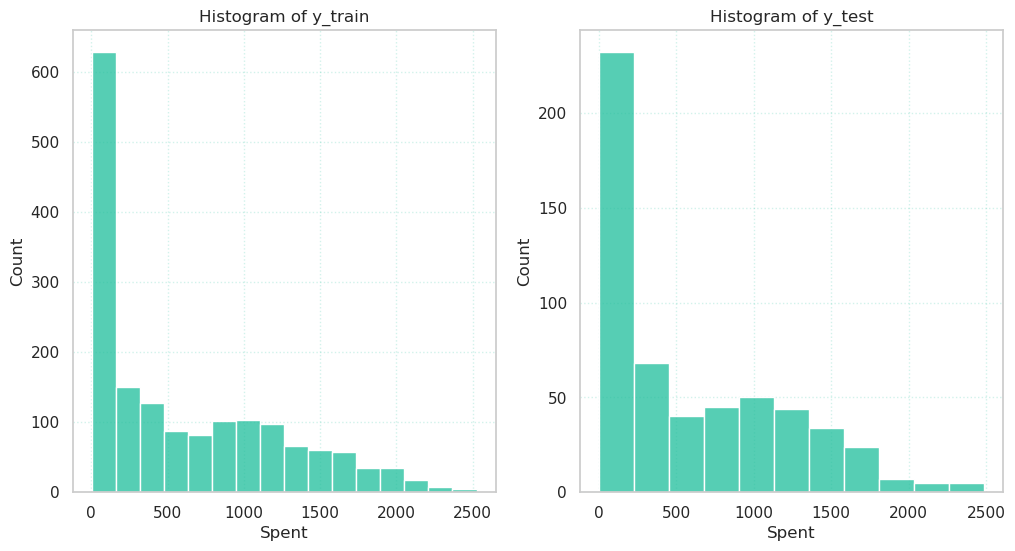

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_train, color='#1ebe9b')
plt.title('Histogram of y_train')

plt.subplot(1, 2, 2)
sns.histplot(y_test, color='#1ebe9b')
plt.title('Histogram of y_test')

plt.show()

In [19]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
print(lm.intercept_)

-293.4859056224104


In [21]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Income,0.004403
Recency,0.078604
WebPurch,30.259798
CatalogPurch,98.377954
StorePurch,48.050891


## Predictions from our Model

In [22]:
predictions = lm.predict(X_test)

In [23]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions, squared=True))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error:  187.23436989640257
Mean Squared Error:  75244.9668507371
RMSE:  274.3081603794118


According to the values obtained above, we can compare them with other values obtained through other regression models used to explore the data.

### Scatter diagram

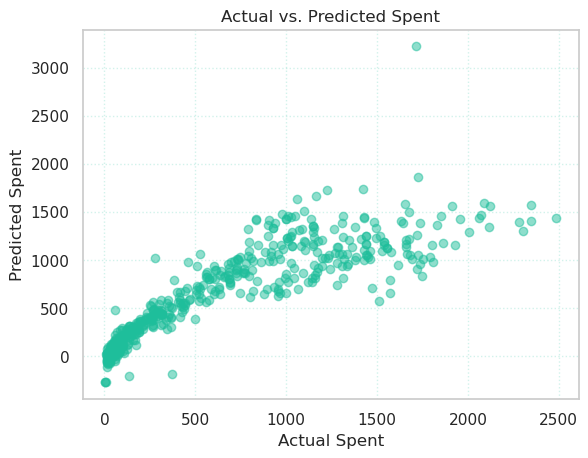

In [24]:
plt.scatter(y_test, predictions, color='#1ebe9b', alpha=0.5)


plt.xlabel("Actual Spent")
plt.ylabel("Predicted Spent")
plt.title("Actual vs. Predicted Spent")

plt.show()

### Residual Histogram

<Axes: xlabel='Spent', ylabel='Count'>

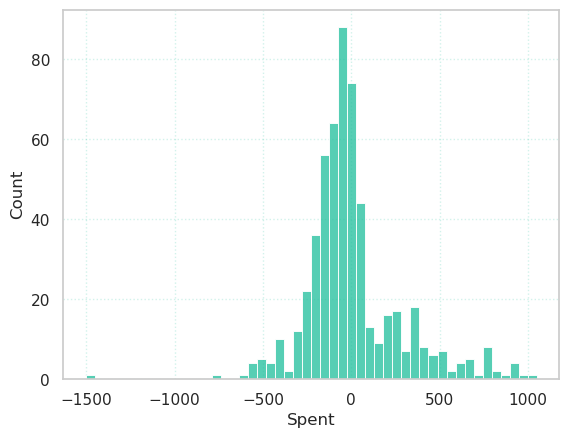

In [25]:
sns.histplot((y_test - predictions), bins=50, color='#1ebe9b')

# Conclusion

After exploring the data using the linear regression model, we can conclude that this model is not the most suitable for exploring the data in the selected dataset. For this reason, we decided to continue exploring the data with another regression model.